# QuantileTransformer

- Useful when feature has outliers.
- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, - this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
- Makes data more Gaussian-like.


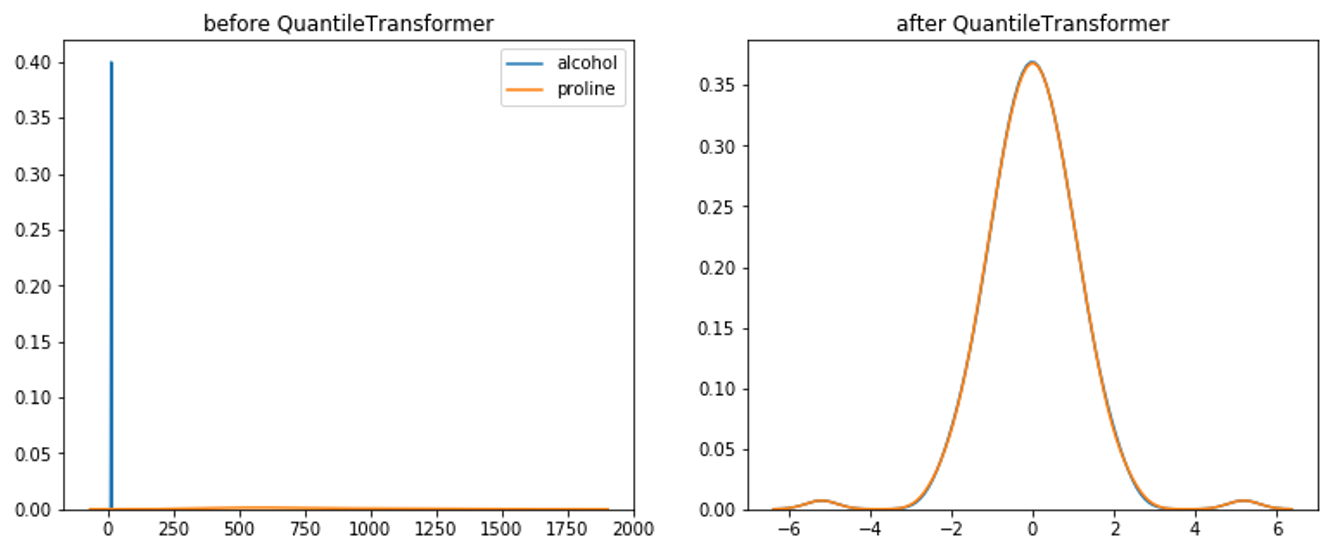


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)


In [5]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

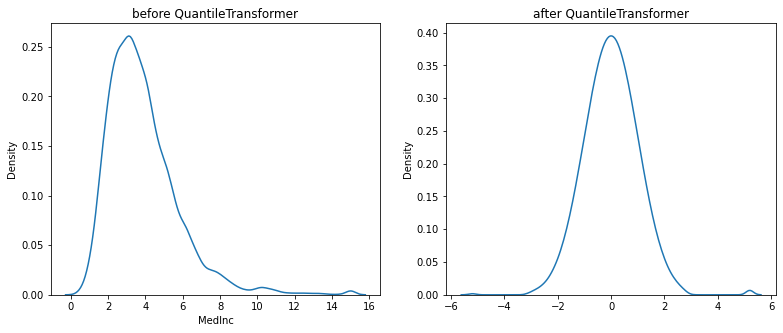

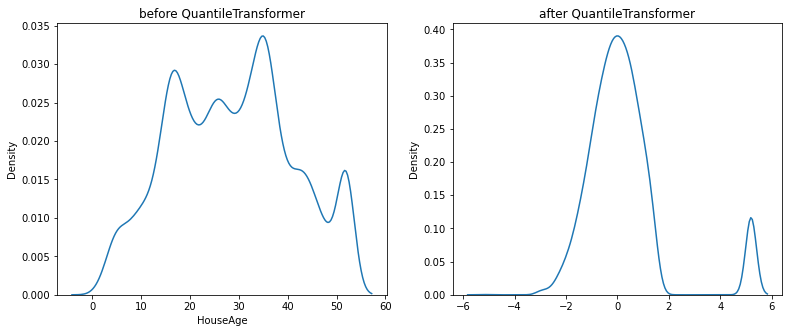

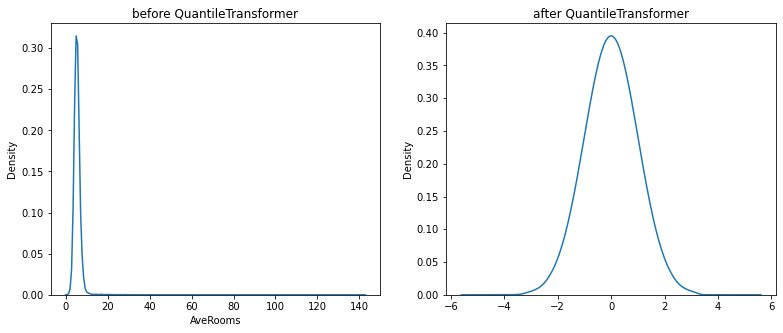

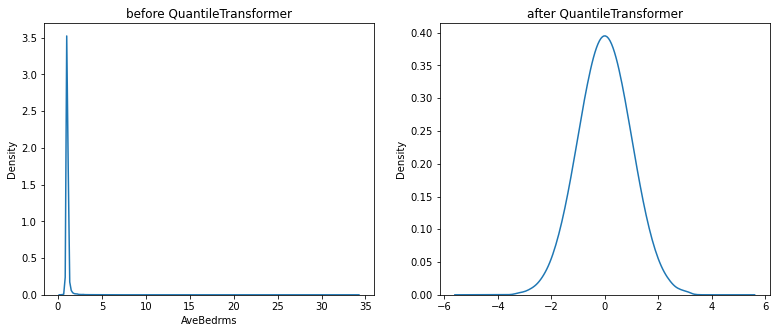

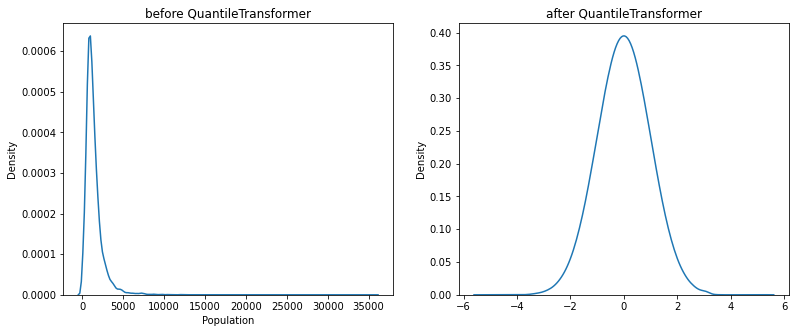

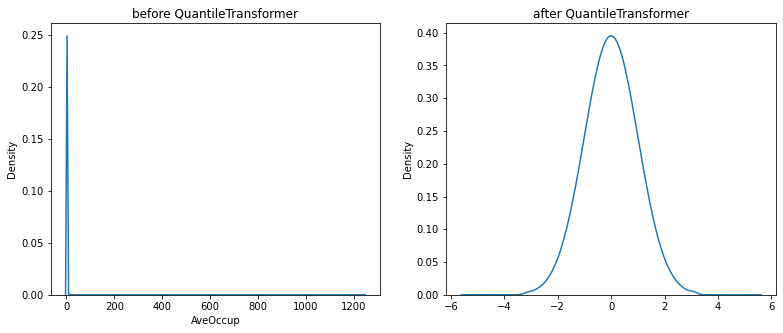

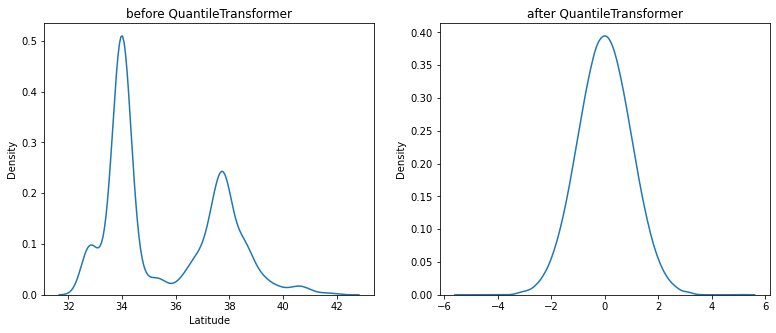

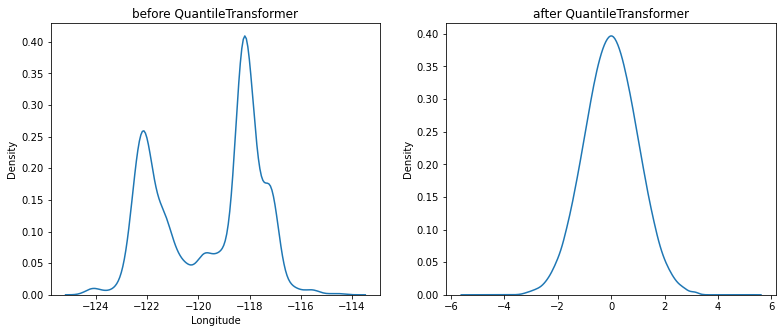

In [6]:
for col in X.columns:
    plots(X, col, QuantileTransformer(output_distribution='normal'))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [8]:
p = QuantileTransformer(output_distribution='normal')
p.fit_transform(X_train)

array([[ 0.42299527, -1.84481081,  1.67936653, ...,  0.92680205,
        -0.9165865 ,  1.07297288],
       [ 0.49786003,  5.19933758,  0.07604477, ...,  0.72514284,
         0.70071085, -1.56272149],
       [ 0.23148337, -0.16891199, -0.48176968, ..., -0.06251273,
        -0.9165865 ,  0.67685415],
       ...,
       [-0.20865521,  0.13084756, -1.45136173, ..., -1.81586839,
         0.24196303, -0.75800423],
       [ 1.07165125,  0.35081689, -0.59136509, ..., -0.99960138,
        -1.28383641,  0.77483284],
       [-1.89546022, -1.04657574, -1.15421657, ...,  0.85574904,
        -1.71096764,  2.57548332]])

In [9]:
p.quantiles_

array([[ 4.99900000e-01,  1.00000000e+00,  8.46153846e-01, ...,
         7.50000000e-01,  3.25400000e+01, -1.24350000e+02],
       [ 5.36000000e-01,  2.00000000e+00,  1.74962005e+00, ...,
         1.30778087e+00,  3.25700000e+01, -1.24180000e+02],
       [ 7.44654154e-01,  2.00000000e+00,  2.01837721e+00, ...,
         1.36061369e+00,  3.25800000e+01, -1.24160000e+02],
       ...,
       [ 1.50001000e+01,  5.20000000e+01,  2.40225396e+01, ...,
         9.93775031e+00,  4.14772472e+01, -1.15390551e+02],
       [ 1.50001000e+01,  5.20000000e+01,  2.95341602e+01, ...,
         1.38383057e+01,  4.17547247e+01, -1.14625275e+02],
       [ 1.50001000e+01,  5.20000000e+01,  1.41909091e+02, ...,
         5.99714286e+02,  4.19500000e+01, -1.14310000e+02]])

In [10]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', QuantileTransformer(output_distribution='normal')),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [11]:
model_accuracy_scaled(KNeighborsRegressor())

0.7317748318867981

In [12]:
model_accuracy_unscaled(KNeighborsRegressor())

0.14312051440566032

In [13]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.7990224555103106

In [14]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.7986931773699132